In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

import project_types as pt
import codebase as cb
import pandas as pd
from IPython.display import Markdown

def pmark(s):
    display(Markdown(s))

pd.set_option('display.max_colwidth', -1)
FIGSIZE = [10, 10]

In [28]:
from importlib import reload
reload(cb);
reload(pt);

# __Data preparation__

Ensure to have the following file structure </br>
image_analysis/models/ </br>
├── project_types.py </br>
├── ... </br>
├── codebase.py </br>
├── data/ </br>
&emsp;&emsp;├── all_data_info.csv (https://www.kaggle.com/c/painter-by-numbers/)</br>
&emsp;&emsp;├── train_1/ (keep consistency with project_types.py->pict_dset) </br>
&emsp;&emsp;├── arcDataset/ (https://www.kaggle.com/wwymak/architecture-dataset) </br>
&emsp;&emsp;&emsp;&emsp;├── Achaemenid architecture/ </br>
&emsp;&emsp;&emsp;&emsp;├── ... </br>
&emsp;&emsp;&emsp;&emsp;├── American Foursquare architecture/

In [29]:
# Load the dataframes
pict_df, arch_df = cb.load_data(max_size=[2000, 2000])

In [30]:
assert not arch_df.isnull().sum().any()
assert not pict_df.isnull().sum().any()

## art or building?

In [31]:
# Compute the art_or_building dataset
art_or_building = cb.get_art_or_building(pict_df, arch_df)

# Sample only some values by stratified sampling
art_or_building_sample = cb.stratified_sample(art_or_building, col='art_class', frac=.01)
# Load images data
art_or_building_sample = cb.load_imgs(art_or_building_sample)

Not rgb image /Users/swedishhdcamera/Desktop/Projects/ArtGuide/image_analysis/models/data/arcDataset/Art Deco architecture/1798_464px-TorontoStar1.jpg


In [32]:
assert not art_or_building_sample.isnull().sum().any()

## art or building? Image check

Now we show some images to check if it is all ok

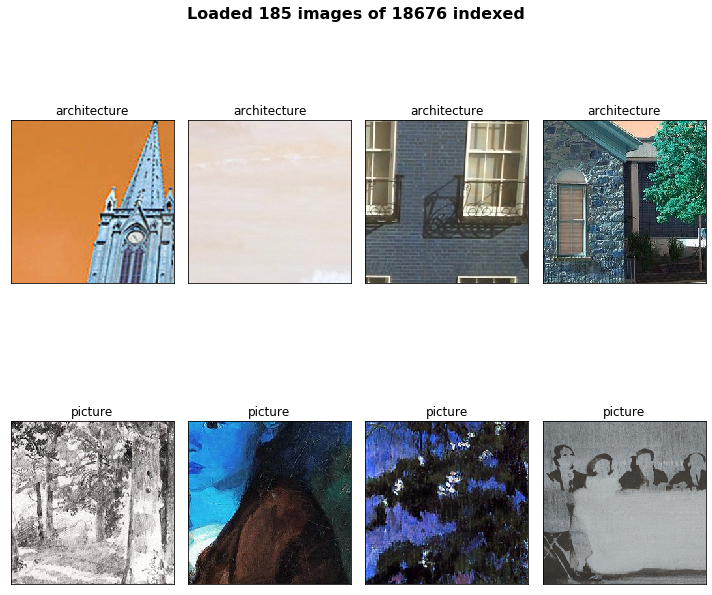

In [33]:
grid_cols = 4
fig = plt.figure(figsize=FIGSIZE)

arch_sample = art_or_building_sample[art_or_building_sample['art_class']=='architecture'].sample(grid_cols)
pic_sample = art_or_building_sample[art_or_building_sample['art_class']=='picture'].sample(grid_cols)

for idx in range(grid_cols*2):
    ax = fig.add_subplot(2,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    if idx>=4:
        el = pic_sample.iloc[idx-4]
    else:
        el = arch_sample.iloc[idx]
    ax.set_title(el.art_class)
    
    plt.imshow(np.array(el.img).astype(int))

title = f'Loaded {len(art_or_building_sample)} images of {len(art_or_building)} indexed'
fig.suptitle(title, fontsize=16, fontweight='bold')    
fig.tight_layout()

## whats style dataset

The whole dataset has 136 styles

In [34]:
# Compute the whats_style dataset
whats_style_pict = cb.get_whats_style(pict_df)
# Stratified sampling
whats_style_pict_sample = cb.stratified_sample(whats_style_pict, col='style', frac=.01)

# Load images
whats_style_pict_sample = cb.load_imgs(whats_style_pict_sample)

In [35]:
assert not whats_style_pict_sample.isnull().sum().any()

In [36]:
whats_style_pict_sample.iloc[0].img.shape

TensorShape([250, 250, 3])

## whats style dataset image check

Now we show some images to check if it is all ok

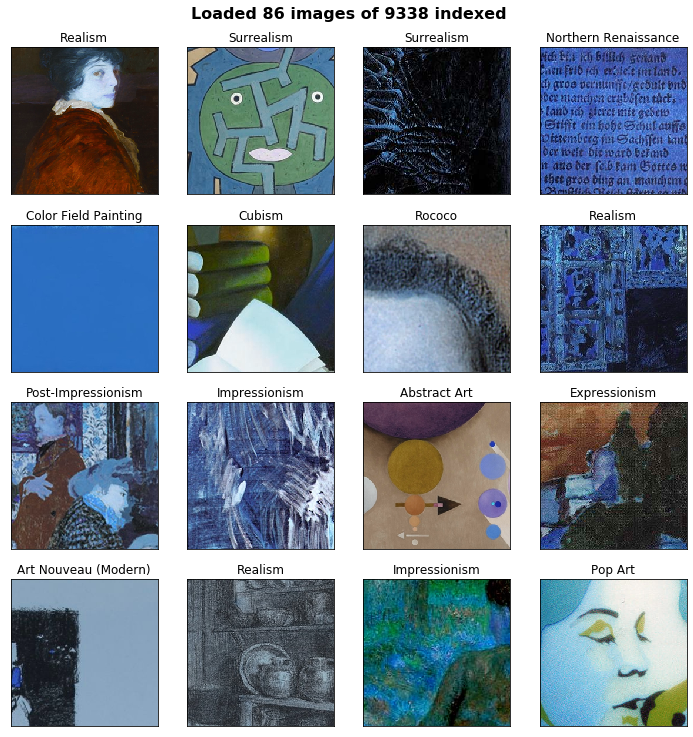

In [37]:
grid_cols = 4
grid_rows = 4 
fig = plt.figure(figsize=FIGSIZE)

pict_sample = whats_style_pict_sample.sample(grid_cols*grid_rows)

for idx in range(grid_rows*grid_cols):
    ax = fig.add_subplot(grid_rows,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    
    el = pict_sample.iloc[idx]
    ax.set_title(el.style)
    plt.imshow(np.array(el.img).astype(int))

title = f'Loaded {len(whats_style_pict_sample)} images of {len(whats_style_pict)} indexed'
fig.suptitle(title, fontsize=16, y=1.02, fontweight='bold')
fig.tight_layout()

## whats style architecture

The whole dataset has 25 styles

In [38]:
# Compute the whats_style dataset
whats_style_arch = cb.get_whats_style(arch_df)
# Stratified sampling
whats_style_arch_sample = cb.stratified_sample(whats_style_arch, col='style', frac=.01)

# Load images
whats_style_arch_sample = cb.load_imgs(whats_style_arch_sample)

Not rgb image /Users/swedishhdcamera/Desktop/Projects/ArtGuide/image_analysis/models/data/arcDataset/arcDataset/Art Deco architecture/2537_800px-TH%26B_Railway_Station_2.JPG
Not rgb image /Users/swedishhdcamera/Desktop/Projects/ArtGuide/image_analysis/models/data/arcDataset/Novelty architecture/151_375px-Lucy_from_the_front_BW.jpg


In [39]:
assert not whats_style_arch_sample.isnull().sum().any()

## whats style architecture Data checking

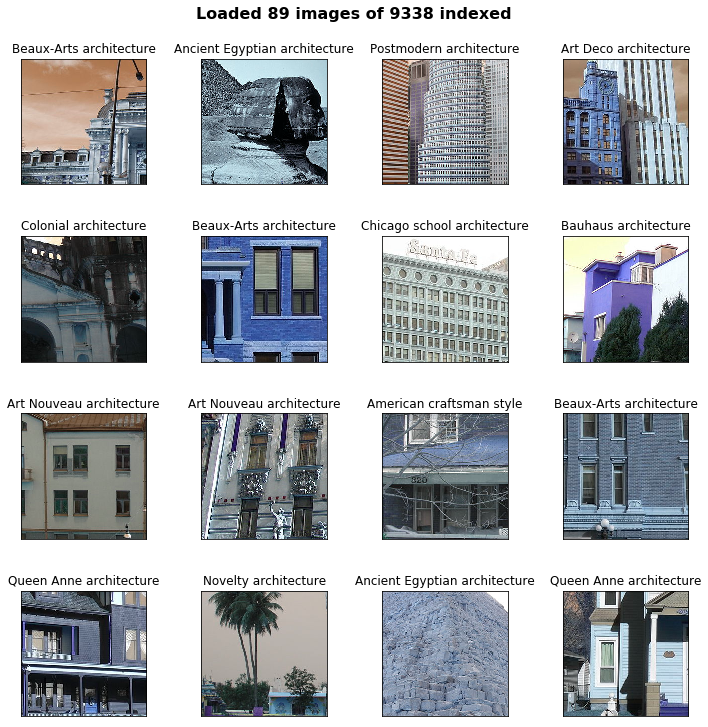

In [40]:
grid_cols = 4
grid_rows = 4 
fig = plt.figure(figsize=FIGSIZE)

arch_sample = whats_style_arch_sample.sample(grid_cols*grid_rows)

for idx in range(grid_rows*grid_cols):
    ax = fig.add_subplot(grid_rows,grid_cols,idx+1)
    plt.xticks([])
    plt.yticks([])
    
    el = arch_sample.iloc[idx]
    ax.set_title(el.style)
    plt.imshow(np.array(el.img).astype(int))

title = f'Loaded {len(whats_style_arch_sample)} images of {len(whats_style_arch)} indexed'
fig.suptitle(title, fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()

# Test dataset

In [73]:
# Load the dataframe
pict_df, arch_df = cb.load_data(max_size=[2000, 2000])

# Compute the art_or_building dataset
aob = cb.get_art_or_building(pict_df, arch_df)
aob = cb.stratified_sample(aob, col='art_class', frac=.01)

# Load images data
aob_imgs = cb.load_imgs(aob)

x, y = cb.to_tf(aob_imgs)
pmark(f'Training set: {x.shape}<br/> Test set: {y.shape}')

Training set: (182, 250, 250, 3)<br/> Test set: (182, 2)